In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [88]:
data=pd.read_csv(r'skin cancer mortality 1975-2020.csv')
data.shape

(46, 2)

In [89]:
data=data.set_index(['Year'])
data.head()

,observed mortality rate
Year,
1975,2.07
1976,2.24
1977,2.27
1978,2.31
1979,2.42


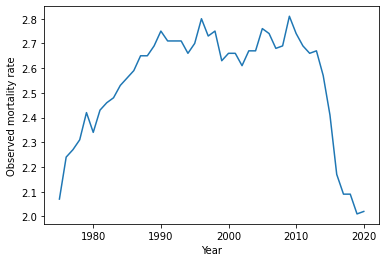

In [90]:
plt.xlabel("Year")
plt.ylabel("Observed mortality rate")
plt.plot(data)

In [91]:
rolmean=data.rolling(window=2).mean()
rolstd=data.rolling(window=2).std()
print(rolmean.head(15))
print(rolstd.head(15))

      observed mortality rate
Year                         
1975                      NaN
1976                    2.155
1977                    2.255
1978                    2.290
1979                    2.365
1980                    2.380
1981                    2.385
1982                    2.445
1983                    2.470
1984                    2.505
1985                    2.545
1986                    2.575
1987                    2.620
1988                    2.650
1989                    2.670
      observed mortality rate
Year                         
1975                      NaN
1976                 0.120208
1977                 0.021213
1978                 0.028284
1979                 0.077782
1980                 0.056569
1981                 0.063640
1982                 0.021213
1983                 0.014142
1984                 0.035355
1985                 0.021213
1986                 0.021213
1987                 0.042426
1988                 0.000000
1989      

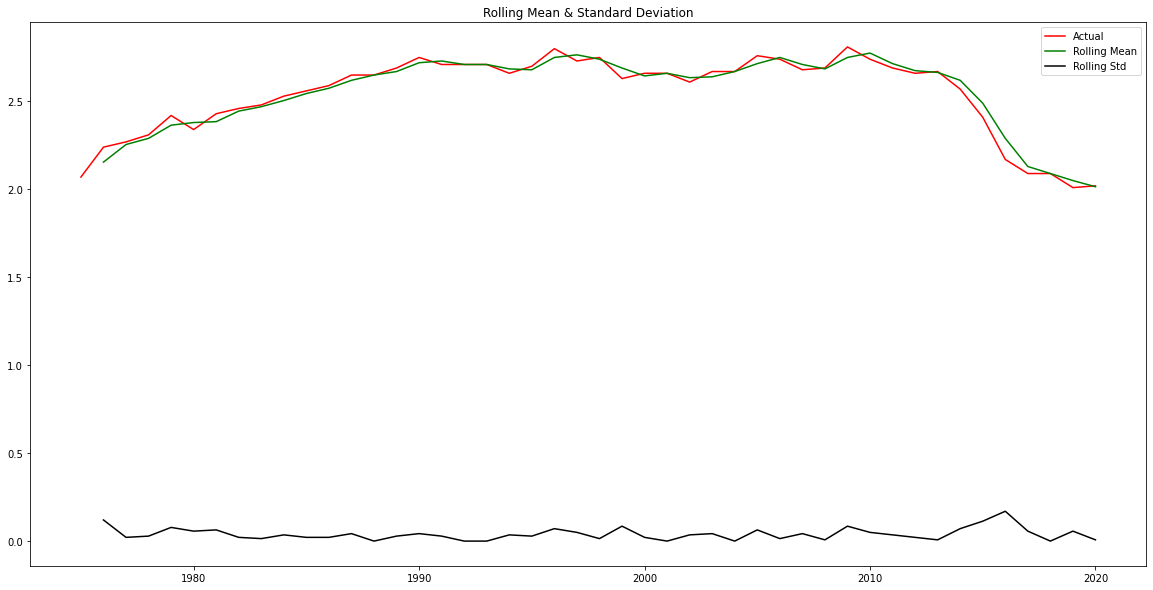

In [92]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [93]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['observed mortality rate'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -0.929392
p-value                  0.778139
Lags Used                0.000000
No. of Obs              45.000000
Critical Value (1%)     -3.584829
Critical Value (5%)     -2.928299
Critical Value (10%)    -2.602344
dtype: float64


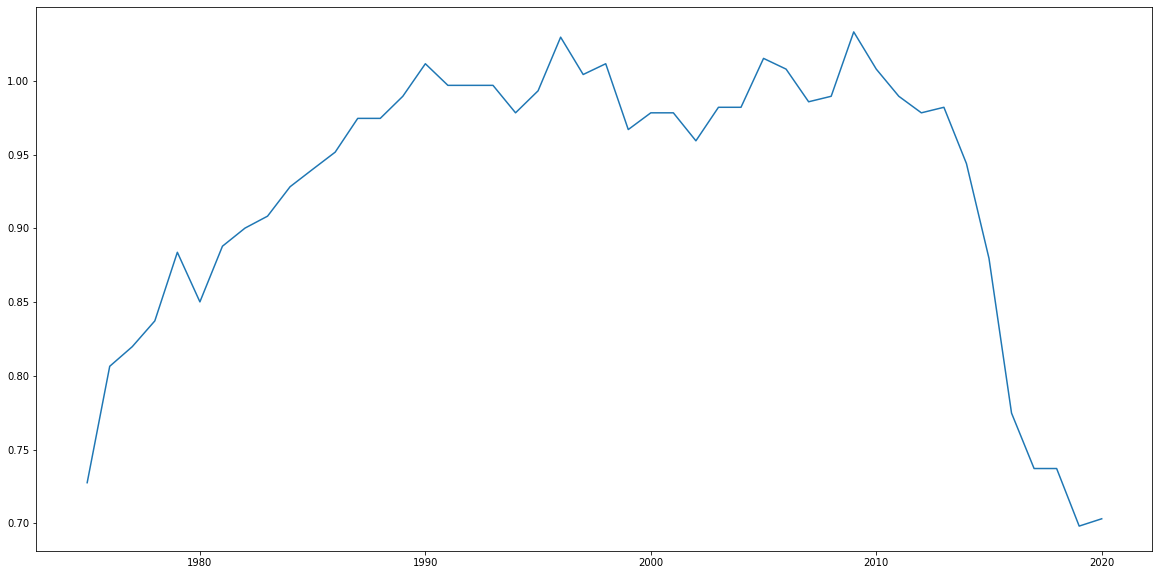

In [94]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

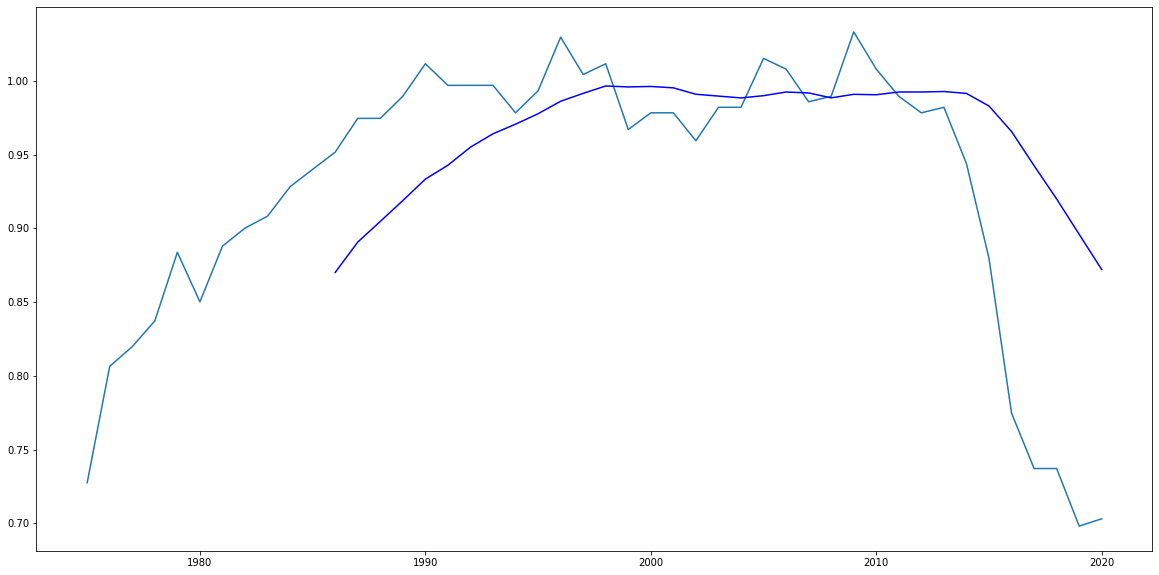

In [95]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [96]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,observed mortality rate
Year,
1975,NaN
1976,NaN
1977,NaN
1978,NaN
1979,NaN
1980,NaN
1981,NaN
1982,NaN
1983,NaN


In [97]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,observed mortality rate
Year,
1986,0.081561
1987,0.083878
1988,0.069871
1989,0.070706
1990,0.078236


In [112]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Mean') 
    std_6=plt.plot(rolstd, color='black', label='Std')
    plt.legend(loc='best')
    plt.title(' Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['observed mortality rate'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

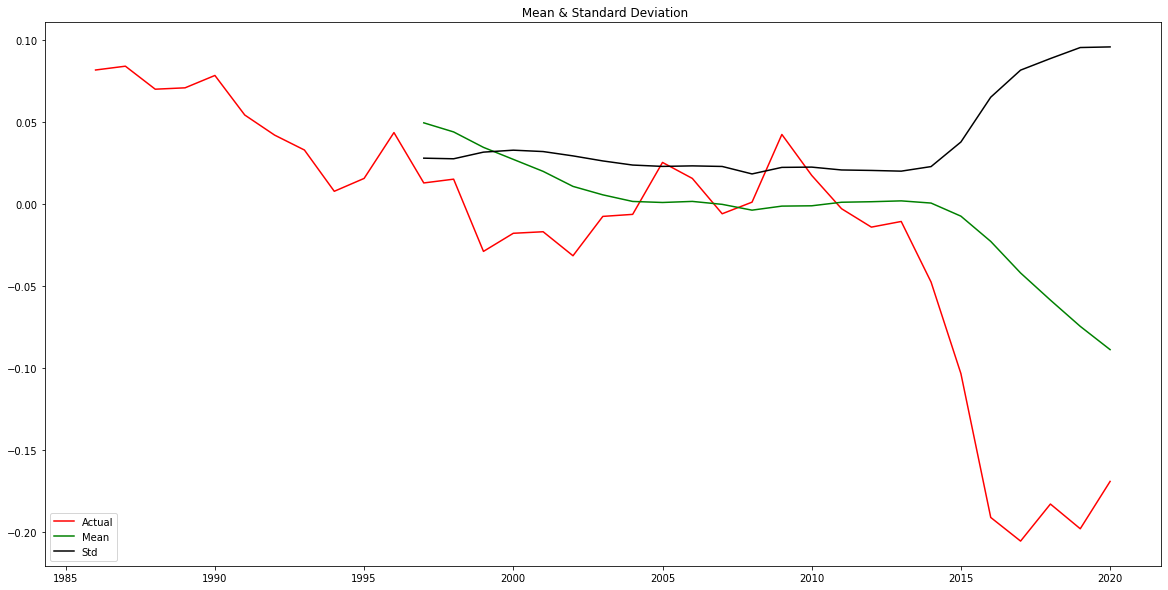

Dickey-Fuller Test: 
Test Statistic          -0.338234
p-value                  0.919912
Lags Used                0.000000
No. of Obs              34.000000
Critical Value (1%)     -3.639224
Critical Value (5%)     -2.951230
Critical Value (10%)    -2.614447
dtype: float64


In [113]:
stationarity(data_log_diff)

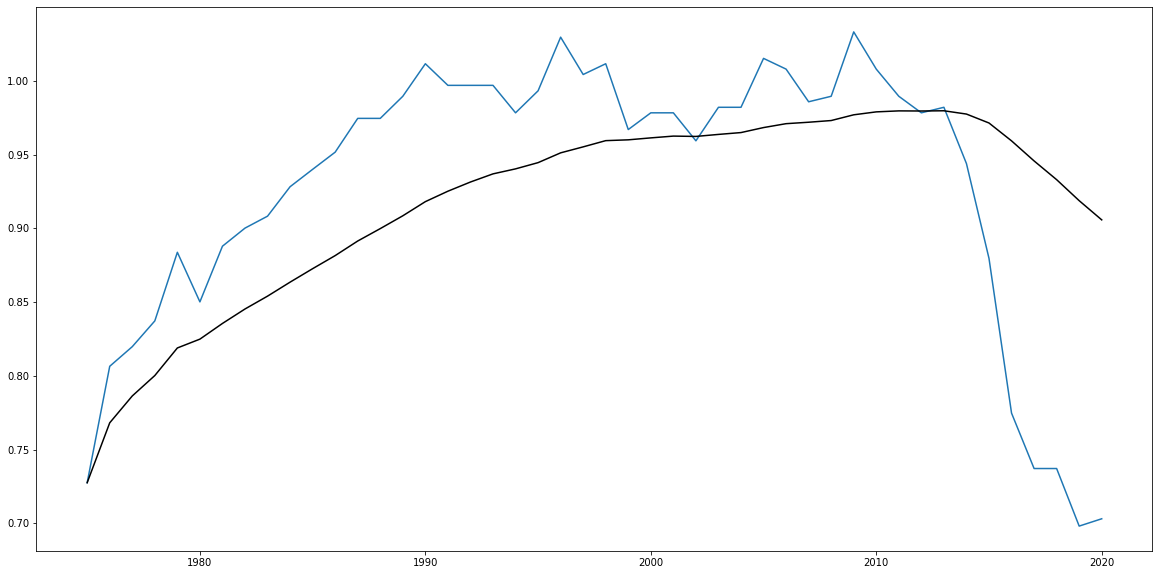

In [114]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

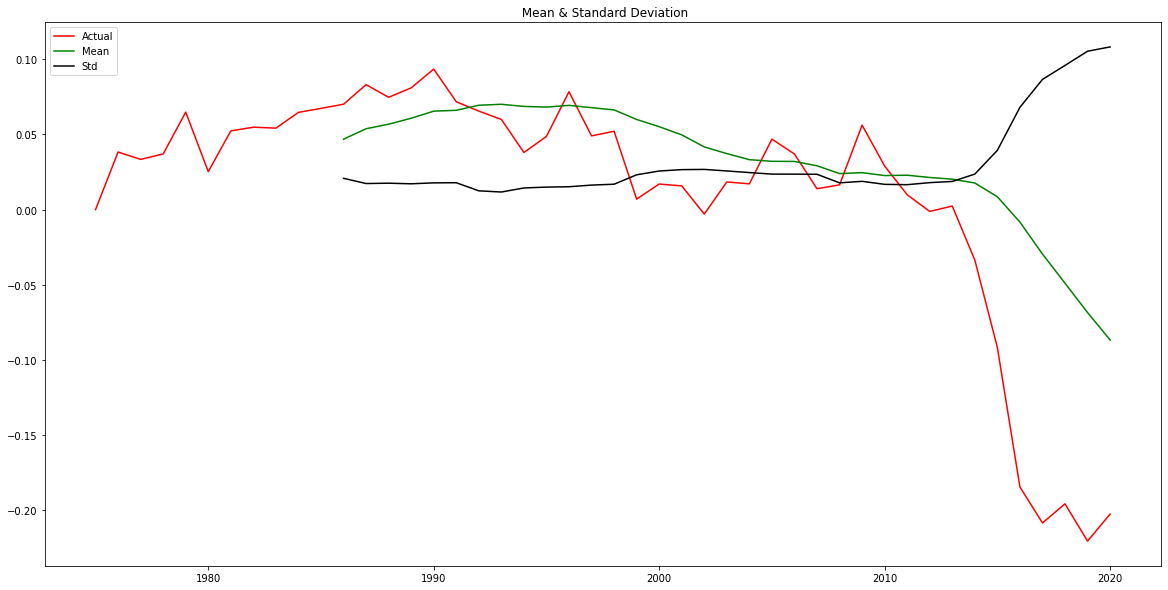

Dickey-Fuller Test: 
Test Statistic           0.645705
p-value                  0.988690
Lags Used                0.000000
No. of Obs              45.000000
Critical Value (1%)     -3.584829
Critical Value (5%)     -2.928299
Critical Value (10%)    -2.602344
dtype: float64


In [115]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

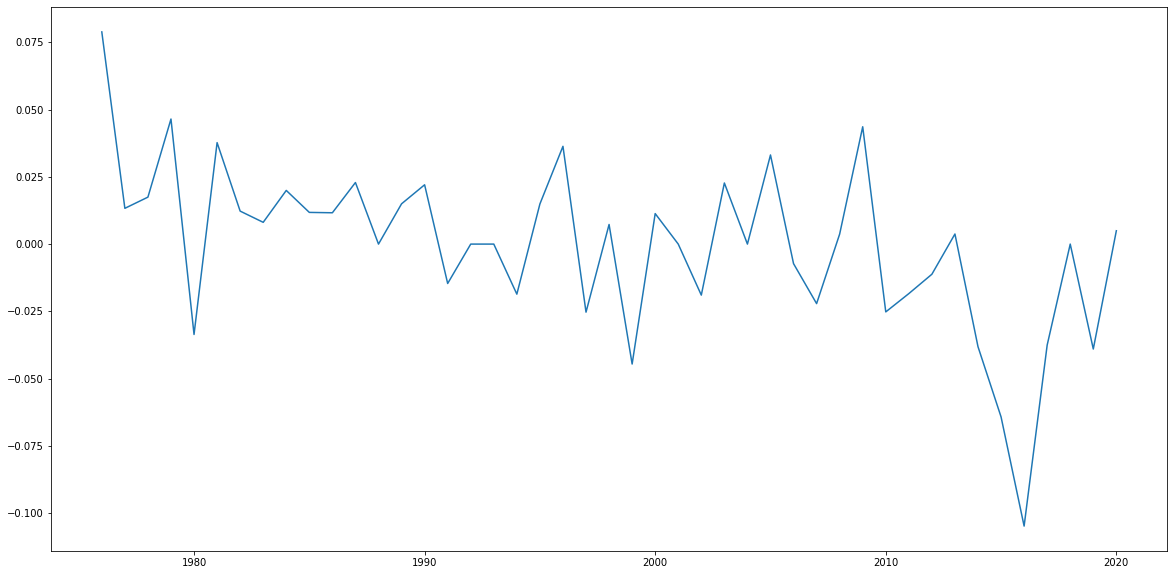

In [116]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

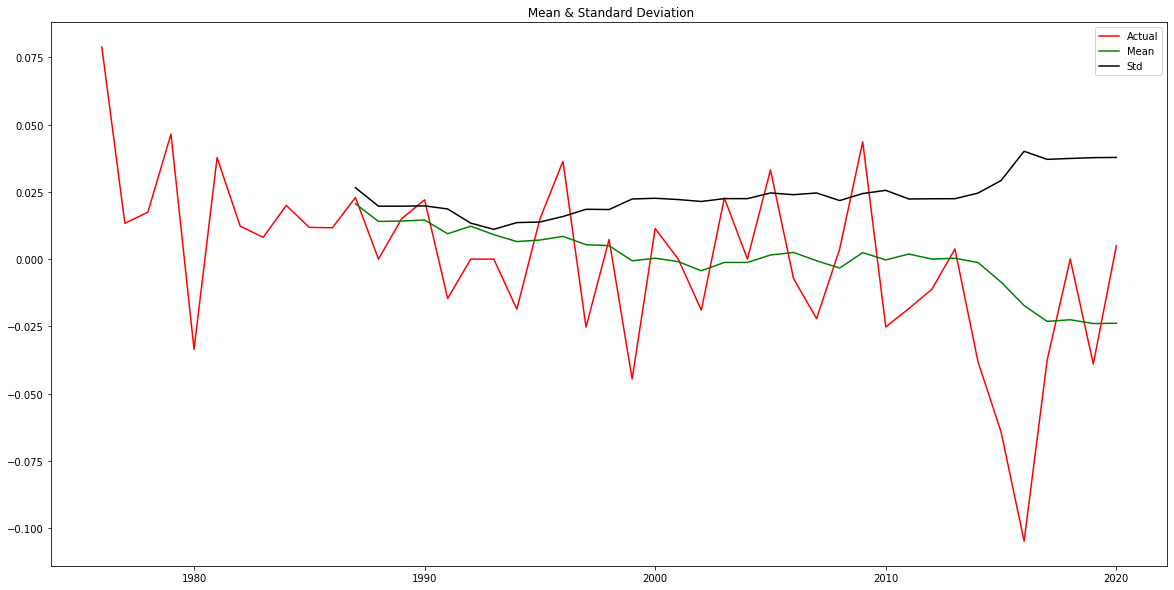

Dickey-Fuller Test: 
Test Statistic          -5.481277
p-value                  0.000002
Lags Used                0.000000
No. of Obs              44.000000
Critical Value (1%)     -3.588573
Critical Value (5%)     -2.929886
Critical Value (10%)    -2.603185
dtype: float64


In [117]:
data_shift=data_shift.dropna()
stationarity(data_shift)

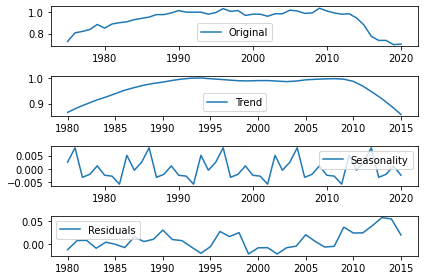

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log, period=10)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

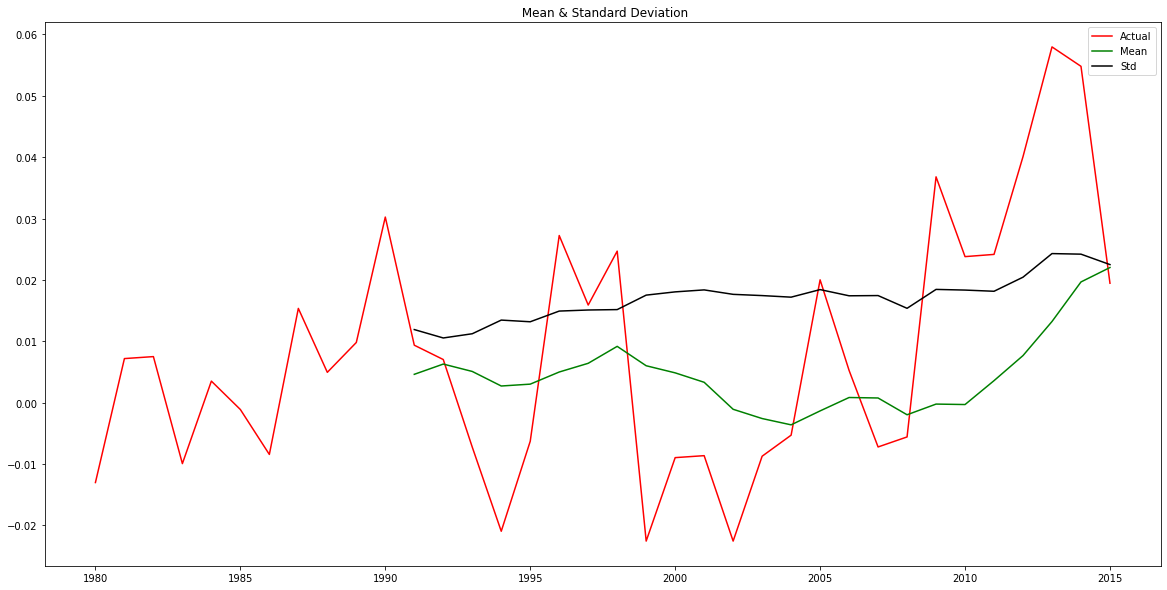

Dickey-Fuller Test: 


KeyError: 'observed mortality rate'

In [119]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

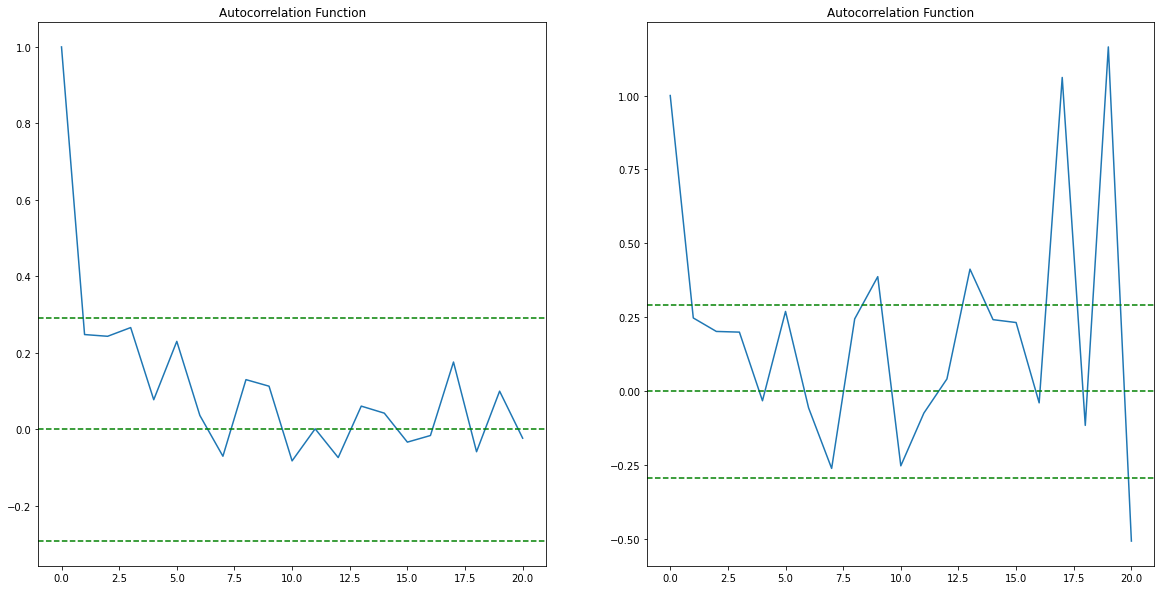

In [120]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

In [156]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['observed mortality rate'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-95.276, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1.976, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-99.364, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-44.542, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=218.721, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-99.998, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-99.935, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-101.128, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-99.249, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-100.886, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-98.555, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-91.834, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.530 seconds


In [157]:
print(data.shape)
train=data.iloc[:-8]
test=data.iloc[-8:]
print(train.shape,test.shape)

(46, 1)
(38, 1) (8, 1)


In [158]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['observed mortality rate'],order=(2,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     observed mortality rate   No. Observations:                   38
Model:                      ARIMA(2, 0, 1)   Log Likelihood                  49.749
Date:                     Sat, 10 Dec 2022   AIC                            -89.499
Time:                             02:39:00   BIC                            -81.311
Sample:                                  0   HQIC                           -86.586
                                      - 38                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4445      0.200     12.195      0.000       2.052       2.837
ar.L1          0.7318      1.597      0.458      0.647      -2.399       3.863
ar.L2          0.2398      1.557      0.154      0.878      -2.812       3.292
ma.L1          0.1241      1.667      0.074      0.941      -3.143       3.392
sigma2         0.0040      0.001      4.071      0.000       0.002       0.006
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.22   Prob(JB):                         0.90
Heteroskedasticity (H):               0.57   Skew:                             0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['observed mortality rate'].mean()
rmse=sqrt(mean_squared_error(pred,test['observed mortality rate']))
print(rmse)

0.45188892293698907


plotting ARIMA model


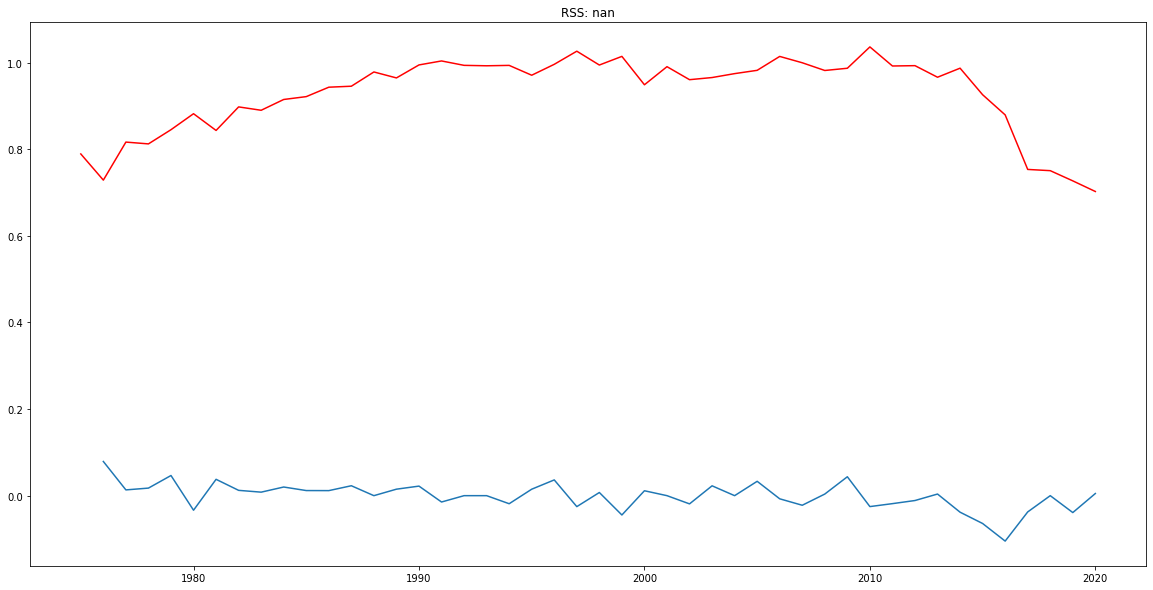

In [144]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,0,1))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['observed mortality rate'])**2))
print('plotting ARIMA model')

In [145]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Year
1975    0.789064
1976    0.728640
1977    0.816460
1978    0.812286
1979    0.845059
dtype: float64


In [146]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Year
1975    0.789064
1976    1.517704
1977    2.334164
1978    3.146449
1979    3.991509
dtype: float64


In [151]:
predictions_log=pd.Series(data_log['observed mortality rate'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Year
1975    1.516612
1976    2.324179
1977    3.153944
1978    3.983697
1979    4.875276
dtype: float64

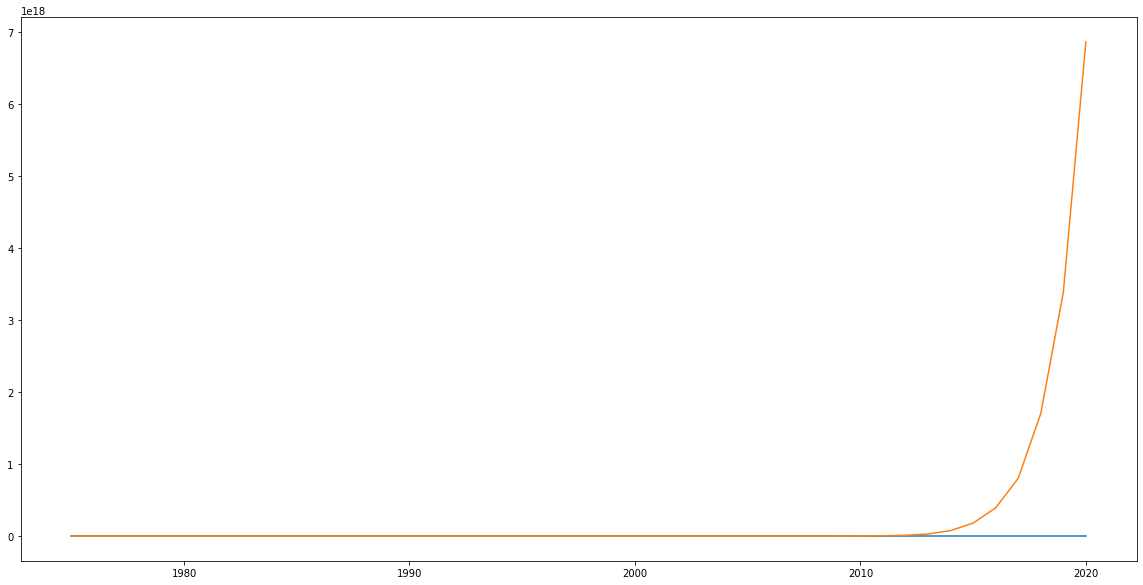

In [152]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)